In [1]:
import numpy as np
import pandas as pd
import math
import time
from datetime import timedelta

In [2]:
df = pd.read_json('data/yelp_academic_dataset_business.json', lines=True)

In [3]:
print("df.shape", df.shape)
df.head()

df.shape (150346, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [4]:
# drop all records with NA values and drop irrelevant columns
df = df.dropna()
df = df.drop(columns=['name', 'address', 'city'])
print("df.shape", df.shape)

df.shape (117618, 11)


In [5]:
# only keep currently open businesses
df = df[df['is_open']==1]
# remove is_open column since it only contains 1s now
df = df.drop(columns='is_open')
print("df.shape", df.shape)
df.head()

df.shape (94976, 10)


,business_id,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours
1,mpf3x-BjTdTEA3yCZrAYPw,MO,63123,38.551126,-90.335695,3.0,15,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
3,MTSW4McQd7CbVtyjqoe9mw,PA,19107,39.955505,-75.155564,4.0,80,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,PA,18054,40.338183,-75.471659,4.5,13,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,TN,37015,36.269593,-87.058943,2.0,6,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
6,n_0UpQx1hsNbnPUSlodU8w,MO,63144,38.627695,-90.340465,2.5,13,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."


In [6]:
# only keep businesses that are categorizes as 'Restaurants'
df = df[df['categories'].str.contains('Restaurants')]
print("df.shape", df.shape)
df.head()

df.shape (31357, 10)


,business_id,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,PA,19107,39.955505,-75.155564,4.0,80,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
5,CF33F8-E6oudUQ46HnavjQ,TN,37015,36.269593,-87.058943,2.0,6,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
9,bBDDEgkFA1Otx9Lfe7BZUQ,TN,37207,36.208102,-86.768170,1.5,10,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
11,eEOYSgkmpB90uNA7lDOMRA,FL,33602,27.955269,-82.456320,4.0,10,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."
12,il_Ro8jwPlHresjw9EGmBg,IN,46227,39.637133,-86.127217,2.5,28,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."


In [7]:
df = df.join(pd.json_normalize(df['attributes']))
df = df.join(pd.json_normalize(df['hours']))
df = df.drop(columns=['attributes', 'hours'])

In [8]:
def parse_hours(day_hours_str):
    if pd.isna(day_hours_str):
        return 0
    
    time_endpoints = str(day_hours_str).split('-')

    if time_endpoints[0] == time_endpoints[1]:
        # 0:0-0:0
        return 0
    
    start_time = time.strptime(time_endpoints[0], "%H:%M")
    end_time = time.strptime(time_endpoints[1], "%H:%M")

    # account for edge cases in data where we have 10-1, which is technically 10am-1am
    et_hour = (24 + end_time.tm_hour) if end_time.tm_hour < start_time.tm_hour else end_time.tm_hour
    
    start_time_td = timedelta(hours=start_time.tm_hour, minutes=start_time.tm_min)
    end_time_td = timedelta(hours=et_hour, minutes=end_time.tm_min)

    duration = end_time_td - start_time_td

    return duration.total_seconds() / 3600

total_hours_arr = []
count_neg = 0

for ind in df.index:
    total_hours = 0
    
    # print(df['name'][ind])
    # print(df['address'][ind])
    
    monday_hours_str = df['Monday'][ind]
    # print("monday hours string", monday_hours_str)
    monday_hours = parse_hours(monday_hours_str)
    # print("monday hours parsed", monday_hours)
    total_hours += monday_hours

    tuesday_hours_str = df['Tuesday'][ind]
    # print("tuesday hours string", tuesday_hours_str)
    tuesday_hours = parse_hours(tuesday_hours_str)
    # print("tuesday hours parsed", tuesday_hours)
    total_hours += tuesday_hours

    wednesday_hours_str = df['Wednesday'][ind]
    # print("wednesday hours string", wednesday_hours_str)
    wednesday_hours = parse_hours(wednesday_hours_str)
    # print("wednesday hours parsed", wednesday_hours)
    total_hours += wednesday_hours

    thursday_hours_str = df['Thursday'][ind]
    # print("thursday hours string", thursday_hours_str)
    thursday_hours = parse_hours(thursday_hours_str)
    # print("thursday hours parsed", thursday_hours)
    total_hours += thursday_hours

    friday_hours_str = df['Friday'][ind]
    # print("friday hours string", friday_hours_str)
    friday_hours = parse_hours(friday_hours_str)
    # print("friday hours parsed", friday_hours)
    total_hours += friday_hours

    saturday_hours_str = df['Saturday'][ind]
    # print("saturday hours string", saturday_hours_str)
    saturday_hours = parse_hours(saturday_hours_str)
    # print("saturday hours parsed", saturday_hours)
    total_hours += saturday_hours

    sunday_hours_str = df['Sunday'][ind]
    # print("sunday hours string", sunday_hours_str)
    sunday_hours = parse_hours(sunday_hours_str)
    # print("sunday hours parsed", sunday_hours)
    total_hours += sunday_hours

    total_hours_arr.append(total_hours)

df['total_open_hours'] = total_hours_arr
df = df.drop(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df.head()

,business_id,state,postal_code,latitude,longitude,stars,review_count,categories,RestaurantsDelivery,OutdoorSeating,...,BYOB,Corkage,BYOBCorkage,RestaurantsCounterService,Open24Hours,AgesAllowed,AcceptsInsurance,DietaryRestrictions,HairSpecializesIn,total_open_hours
3,MTSW4McQd7CbVtyjqoe9mw,PA,19107,39.955505,-75.155564,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
5,CF33F8-E6oudUQ46HnavjQ,TN,37015,36.269593,-87.058943,2.0,6,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0
9,bBDDEgkFA1Otx9Lfe7BZUQ,TN,37207,36.208102,-86.768170,1.5,10,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
11,eEOYSgkmpB90uNA7lDOMRA,FL,33602,27.955269,-82.456320,4.0,10,"Vietnamese, Food, Restaurants, Food Trucks",True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0
12,il_Ro8jwPlHresjw9EGmBg,IN,46227,39.637133,-86.127217,2.5,28,"American (Traditional), Restaurants, Diners, B...",False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0


In [9]:
df = df.filter(['total_open_hours', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'Alcohol', 'latitude', 'longitude', 'stars'])

In [10]:
df.head()

,total_open_hours,RestaurantsTakeOut,RestaurantsDelivery,Alcohol,latitude,longitude,stars
3,23.0,NaN,NaN,'none',39.955505,-75.155564,4.0
5,53.0,True,True,'full_bar',36.269593,-87.058943,2.0
9,100.0,NaN,NaN,NaN,36.208102,-86.768170,1.5
11,36.0,True,True,NaN,27.955269,-82.456320,4.0
12,34.0,True,False,u'full_bar',39.637133,-86.127217,2.5


In [11]:
df['RestaurantsTakeOut'] = df['RestaurantsTakeOut'].fillna('False')
df['RestaurantsDelivery'] = df['RestaurantsDelivery'].fillna('False')
df['Alcohol'] = df['Alcohol'].fillna('False')
# df = df.dropna()

In [12]:
df['Alcohol'].value_counts()

Alcohol
False               26276
u'none'              2017
u'full_bar'          1418
'none'                626
u'beer_and_wine'      573
'full_bar'            298
'beer_and_wine'       142
None                    7
Name: count, dtype: int64

In [13]:
def alcohol_tf(val):
    if 'beer_and_wine' in val or 'full_bar' in val:
        return True
    else :
        return False

In [14]:
df['Alcohol_TF'] = df['Alcohol'].apply(alcohol_tf)

In [15]:
df.head()

,total_open_hours,RestaurantsTakeOut,RestaurantsDelivery,Alcohol,latitude,longitude,stars,Alcohol_TF
3,23.0,False,False,'none',39.955505,-75.155564,4.0,False
5,53.0,True,True,'full_bar',36.269593,-87.058943,2.0,True
9,100.0,False,False,False,36.208102,-86.768170,1.5,False
11,36.0,True,True,False,27.955269,-82.456320,4.0,False
12,34.0,True,False,u'full_bar',39.637133,-86.127217,2.5,True


In [16]:
df.replace('None', 'False', inplace=True)
df.replace({'True': True, 'False': False}, inplace=True)
df.drop(columns=['Alcohol'], inplace = True)
df = df.rename(columns={'Alcohol_TF':'Alcohol'})

In [17]:
df.head()

,total_open_hours,RestaurantsTakeOut,RestaurantsDelivery,latitude,longitude,stars,Alcohol
3,23.0,False,False,39.955505,-75.155564,4.0,False
5,53.0,True,True,36.269593,-87.058943,2.0,True
9,100.0,False,False,36.208102,-86.768170,1.5,False
11,36.0,True,True,27.955269,-82.456320,4.0,False
12,34.0,True,False,39.637133,-86.127217,2.5,True


In [18]:
# Isolation Forests Outlier Detection
ad_df = df.copy()
from sklearn.ensemble import IsolationForest
X = ad_df.loc[:, ad_df.columns != 'stars']
clf = IsolationForest(random_state=0).fit_predict(X)
ad_df['outlier'] = clf
ad_df['outlier'].value_counts()

outlier
 1    21917
-1     9440
Name: count, dtype: int64

In [19]:
# K Means Clustering Outlier Detection

from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=2, random_state=0)

anomaly_df = df.copy()
X = anomaly_df.loc[:, anomaly_df.columns != 'stars']
k_means.fit(X)

anomaly_df['cluster'] = k_means.predict(X)
anomaly_df['cluster'].value_counts()

cluster
1    25827
0     5530
Name: count, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31357 entries, 3 to 150339
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_open_hours     31357 non-null  float64
 1   RestaurantsTakeOut   31357 non-null  bool   
 2   RestaurantsDelivery  31357 non-null  bool   
 3   latitude             31357 non-null  float64
 4   longitude            31357 non-null  float64
 5   stars                31357 non-null  float64
 6   Alcohol              31357 non-null  bool   
dtypes: bool(3), float64(4)
memory usage: 2.3 MB


In [21]:
df.reset_index()

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

location_df = df[['latitude', 'longitude', 'stars']]

stars = location_df['stars']
location_df = location_df.drop(columns='stars')

scaler = StandardScaler()
location_df = pd.DataFrame(scaler.fit_transform(location_df), columns=location_df.columns)

neigh = NearestNeighbors(n_neighbors=51, n_jobs=-1)

neigh.fit(location_df[['latitude', 'longitude']])

distances, indices = neigh.kneighbors(location_df[['latitude', 'longitude']])

for i in range(len(location_df)):
    location_df.loc[i, 'avg_star_rating'] = stars.iloc[indices[i]].mean()

In [22]:
# DATA CLUSTERING FROM AKSHAT

# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=11)

# kmeans.fit(location_df)

# location_df['cluster'] = kmeans.predict(location_df)

# colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'brown', 'black', 'gray', 'cyan']

# plt.scatter(location_df['latitude'], location_df['longitude'], c=location_df['cluster'].apply(lambda x: colors[x]))

In [23]:
df['stack_1'] = location_df['avg_star_rating'].values
df.drop(columns=['latitude', 'longitude'], inplace=True)
df.head()

,total_open_hours,RestaurantsTakeOut,RestaurantsDelivery,stars,Alcohol,stack_1
3,23.0,False,False,4.0,False,3.960784
5,53.0,True,True,2.0,True,3.225490
9,100.0,False,False,1.5,False,3.235294
11,36.0,True,True,4.0,False,3.931373
12,34.0,True,False,2.5,True,3.284314


In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeRegressor(random_state=0)
X = df.loc[:, df.columns != 'stars']
y = df.loc[:, 'stars']
# fitting the model based on max_depth = 4 because we have 4 features, splitting on them
regressor = DecisionTreeRegressor(random_state=0, max_depth=4)
# no need to normalize for decision tree regressor
regressor.fit(X, y) 
y_pred = regressor.predict(X) 
df['stack_2'] = y_pred
df = df[['RestaurantsTakeOut', 'RestaurantsDelivery', 'Alcohol', 'total_open_hours', 'stack_1', 'stack_2', 'stars']]
# at this point, df is the final dataframe we are using (need to do CV for stack_1 and stack_2 models)
df.head()

,RestaurantsTakeOut,RestaurantsDelivery,Alcohol,total_open_hours,stack_1,stack_2,stars
3,False,False,False,23.0,3.960784,3.927685,4.0
5,True,True,True,53.0,3.225490,3.176283,2.0
9,False,False,False,100.0,3.235294,3.176283,1.5
11,True,True,False,36.0,3.931373,3.927685,4.0
12,True,False,True,34.0,3.284314,3.265017,2.5


In [75]:
labels = df['stars']
features_without_stacks = df.drop(columns=['stack_1', 'stack_2', 'stars'])
features_stack1 = df.drop(columns=['stack_2', 'stars'])
features_stack2 = df.drop(columns=['stack_1', 'stars'])
features_all_stacks = df.drop(columns=['stars'])
print(features_without_stacks.isna().sum().sum())
print(features_stack1.isna().sum().sum())
print(features_stack2.isna().sum().sum())
print(features_all_stacks.isna().sum().sum())

0
0
0
0


In [76]:
# features_without_stacks = features_without_stacks.dropna()
# features_stack1 = features_stack1.dropna()
# features_stack2 = features_stack2.dropna()
# features_all_stacks = features_all_stacks.dropna()

print(len(features_without_stacks))
print(len(features_stack1))
print(len(features_stack2))
print(len(features_all_stacks))

31357
31357
31357
31357


In [27]:
# # setting up neural network, with pipeline that scales the data
# from sklearn.neural_network import MLPRegressor
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import cross_val_predict
# from sklearn.metrics import r2_score

# mlp_reg = MLPRegressor()
# scaler = StandardScaler()
# pipeline = Pipeline([('scaler', scaler), ('mlp', mlp_reg)])
# param_grid = {
#     'mlp__activation': ['logistic', 'tanh', 'relu']
# }
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs = -1)

In [28]:
# # neural net training with features_without_stacks
# predictions = cross_val_predict(grid_search, features_without_stacks, labels, cv=5)
# print("Accuracy of the Neural Net:", r2_score(predictions, labels))

In [29]:
# # neural net training with features_stack1
# predictions = cross_val_predict(grid_search, features_stack1, labels, cv=5)
# print("Accuracy of the Neural Net:", r2_score(predictions, labels))

In [30]:
# # neural net training with features_stack2
# predictions = cross_val_predict(grid_search, features_stack2, labels, cv=5)
# print("Accuracy of the Neural Net:", r2_score(predictions, labels))

In [31]:
# # neural net training with features_all_stacks
# predictions = cross_val_predict(grid_search, features_all_stacks, labels, cv=5)
# print("Accuracy of the Neural Net:", r2_score(predictions, labels))

In [32]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score   

# X_train, X_test, y_train, y_test = train_test_split(features_all_stacks.values, labels.values, test_size=0.4, random_state=42)

In [33]:
# from sklearn.metrics import r2_score, mean_squared_error
# #we want to create a neural network, so we need to import the keras library
# from keras.models import Sequential
# import tensorflow as tf

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(64, activation='relu', input_shape=(6,)),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1)  #1 neuron output
# ])

# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [34]:
# X_test = tf.convert_to_tensor(X_test, dtype = tf.float32)
# y_test = tf.convert_to_tensor(y_test, dtype = tf.float32)
# X_train = tf.convert_to_tensor(X_train, dtype = tf.float32)
# y_train = tf.convert_to_tensor(y_train, dtype = tf.float32)


# model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

In [35]:
# print(model.evaluate(X_test, y_test))

In [36]:
# predictions = model.predict(X_test)

In [37]:
# r2 = r2_score(y_test, predictions)
# print("R2 Score:", r2)

In [38]:
def scatter(data, labels, numPoints = 300):

    numEntries = data.shape[0]
    start = random.randint(0, numEntries - numPoints)
    end = start + numPoints
    data = data.iloc[start:end, :]
    labels = labels.iloc[start:end]
    
    mds = MDS(n_components=2)
    mds_data = mds.fit_transform(data)
    plt.scatter(mds_data[:, 0], mds_data[:, 1], c=labels, s=50)
    plt.show()

In [39]:
df_new = df.drop(columns=['stars'])
df_new.head()

,RestaurantsTakeOut,RestaurantsDelivery,Alcohol,total_open_hours,stack_1,stack_2
3,False,False,False,23.0,3.960784,3.927685
5,True,True,True,53.0,3.225490,3.176283
9,False,False,False,100.0,3.235294,3.176283
11,True,True,False,36.0,3.931373,3.927685
12,True,False,True,34.0,3.284314,3.265017


[4 2 3 ... 0 0 0]
silhouette score: 0.884340417308082


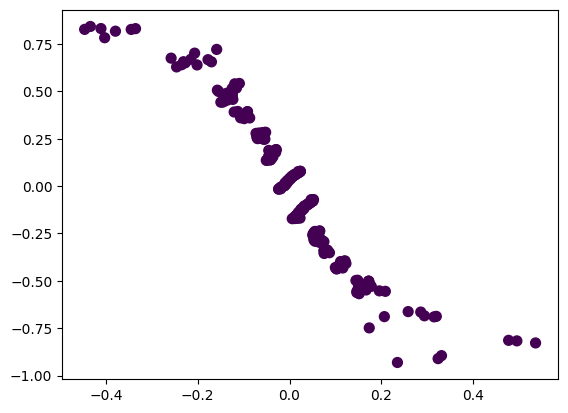

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=9)
curr_clustering = kmeans.fit_predict(features_all_stacks)
sh_score = silhouette_score(features_all_stacks, curr_clustering)
print(curr_clustering)
print(f"silhouette score: {sh_score}")
scatter(features_all_stacks, pd.Series(curr_clustering))

In [41]:
df['preds'] = curr_clustering
df.head()
# currently, clusters don't match up with stars, but our prediction could be average of all of the restaurants in the predicted cluster

,RestaurantsTakeOut,RestaurantsDelivery,Alcohol,total_open_hours,stack_1,stack_2,stars,preds
3,False,False,False,23.0,3.960784,3.927685,4.0,4
5,True,True,True,53.0,3.225490,3.176283,2.0,2
9,False,False,False,100.0,3.235294,3.176283,1.5,3
11,True,True,False,36.0,3.931373,3.927685,4.0,7
12,True,False,True,34.0,3.284314,3.265017,2.5,7


In [63]:
a = features_all_stacks.iloc[:test_curr_start, :].values
b = features_all_stacks.iloc[test_curr_end:, :].values
c = np.concatenate((a, b))
print(c)

[[True True False 74.0 3.8137254901960786 3.856975381008206]
 [True True True 61.0 3.2254901960784315 3.176283411115825]
 [True True True 106.0 3.735294117647059 3.6795439074200136]
 ...
 [False False False 0.0 3.480392156862745 3.485004686035614]
 [False False False 0.0 4.029411764705882 4.076045627376426]
 [False False False 0.0 3.4215686274509802 3.485004686035614]]


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

test_curr_start = 0
test_curr_end = int(len(features_all_stacks) / 10)
increment = int(len(features_all_stacks) / 10)
mse = 0
total_sh_score = 0

for i in range(10):
    print(f"Fold {i+1}:")
    # partition data into train_set and test_set
    a = features_all_stacks.iloc[:test_curr_start, :].values
    b = features_all_stacks.iloc[test_curr_end:, :].values
    X_train = np.concatenate((a, b))
    # X_train = features_all_stacks.iloc[:test_curr_start, :].values + features_all_stacks.iloc[test_curr_end:, :].values
    X_test = features_all_stacks.iloc[test_curr_start:test_curr_end, :].values
    a = labels.iloc[:test_curr_start]
    b = labels.iloc[test_curr_end:]
    y_train = np.concatenate((a, b))
    y_test = labels.iloc[test_curr_start:test_curr_end].values

    kmeans = KMeans(n_clusters=9)
    curr_clustering = kmeans.fit_predict(X_train)

    sh_score = silhouette_score(X_train, curr_clustering)
    total_sh_score += sh_score
    # print(curr_clustering)
    print(f"\tsilhouette score: {sh_score}")
    # scatter(pd.DataFrame(X_train), pd.Series(curr_clustering))

    trained_df = pd.DataFrame(X_train)
    trained_df['k_means_cluster'] = curr_clustering
    trained_df['stars'] = y_train
    # print(trained_df['stars'])
    
    # calculate average star prediction for each cluster
    # print(trained_df.groupby('k_means_cluster', as_index=False)['stars'].mean())

    cluster_preds = trained_df.groupby('k_means_cluster', as_index=False)['stars'].mean()['stars']
    pred_clustering = kmeans.predict(X_test)
    # print(cluster_preds)
    predictions = []
    for i in pred_clustering:
        predictions.append(cluster_preds[i])
    # print(y_test)
    # print(predictions)
    curr_mse = mean_squared_error(y_test, predictions)
    print("\tcurr_mse:", curr_mse)
    mse += curr_mse
    test_curr_start += increment
    test_curr_end += increment
    
print("\naverage sh score", total_sh_score/10)
print("average mse", mse/10)

Fold 1:
	silhouette score: 0.9327137228106784
	curr_mse: 0.7429182943234545
Fold 2:
	silhouette score: 0.9219712116796829
	curr_mse: 0.7219884596428249
Fold 3:
	silhouette score: 0.8912073584235792
	curr_mse: 0.717057910358664
Fold 4:
	silhouette score: 0.879844891456361
	curr_mse: 0.7260857569428687
Fold 5:
	silhouette score: 0.8717091257051997
	curr_mse: 0.7182482616461552
Fold 6:
	silhouette score: 0.8862372284640626
	curr_mse: 0.7802842459950118
Fold 7:
	silhouette score: 0.8862538850339787
	curr_mse: 0.7254719599774553
Fold 8:
	silhouette score: 0.8821836612375814
	curr_mse: 0.7323731636136823
Fold 9:
	silhouette score: 0.8822030587187337
	curr_mse: 0.7459954719965156
Fold 10:
	silhouette score: 0.8822143156366689
	curr_mse: 0.7445890157767017
average sh score 0.8916538459166526
average mse 0.7355012540273334


In [ ]:
# cluster_preds = trained_df.groupby('k_means_cluster', as_index=False)['stars'].mean()['stars']
# pred_clustering = kmeans.predict(X_test)

# predictions = []
# for i in pred_clustering:
#     predictions.append(cluster_preds[i])
# print(predictions)

In [ ]:
# from sklearn.metrics import mean_squared_error
# print(mean_squared_error(y_test, predictions))